In [2]:
from screenTools import *
path = "/Users/rathbunc/Code/screen-processing/ScreenTools/AM 1.27.22 Plates 1-2.xlsx"

In [3]:
data = importPlates(path, [1,1,2,2], ['104', '86', '104', '86'])
controls = ["A1", "A2", "A3", "H10", "H11", "H12"]
print("Got", data.shape[0], "datapoints.")
assignControls(data, controls)
pp = pivotPlates(data)
print(pp)
ratios = computeRatios(pp)
a = find_hits(ratios, -1, 2)
#export_to_pick(a, args["peptide1"], args["peptide2"])
a

Got 384 datapoints.
        plate_number row column     condition   value        
peptide                                           104      86
0                  1   A      1      positive   89496  299061
1                  1   A     10  experimental  127119  272199
2                  1   A     11  experimental   94402  231278
3                  1   A     12  experimental       4      13
4                  1   A      2      positive  121521  224344
..               ...  ..    ...           ...     ...     ...
187                2   H      5  experimental   57430  466359
188                2   H      6  experimental       4       6
189                2   H      7  experimental   57143  612078
190                2   H      8  experimental   26159  478997
191                2   H      9  experimental   20834  262016

[192 rows x 6 columns]


plate_number row column     condition   value            104/86  \
peptide                                           104      86             
0                  1   A      1      positive   89496  299061 -0.523956   
1                  1   A     10  experimental  127119  272199 -0.330676   
2                  1   A     11  experimental   94402  231278 -0.389153   
3                  1   A     12  experimental       4      13 -0.511883   
4                  1   A      2      positive  121521  224344 -0.266263   
..               ...  ..    ...           ...     ...     ...       ...   
187                2   H      5  experimental   57430  466359 -0.909582   
188                2   H      6  experimental       4       6 -0.176091   
189                2   H      7  experimental   57143  612078 -1.029844   
190                2   H      8  experimental   26159  478997 -1.262712   
191                2   H      9  experimental   20834  262016 -1.099555   

           86/104          to_pick  
peptide                             
0        0.523956         positive  
1        0.330676  not significant  
2        0.389153  not significant  
3        0.511883  not significant  
4        0.266263         positive  
..            ...              ...  
187      0.909582               86  
188      0.176091  not significant  
189      1.029844               86  
190      1.262712               86  
191      1.099555  not significant  

[192 rows x 9 columns]

In [18]:
a[a['to_pick'] == '104'].shape

(7, 9)

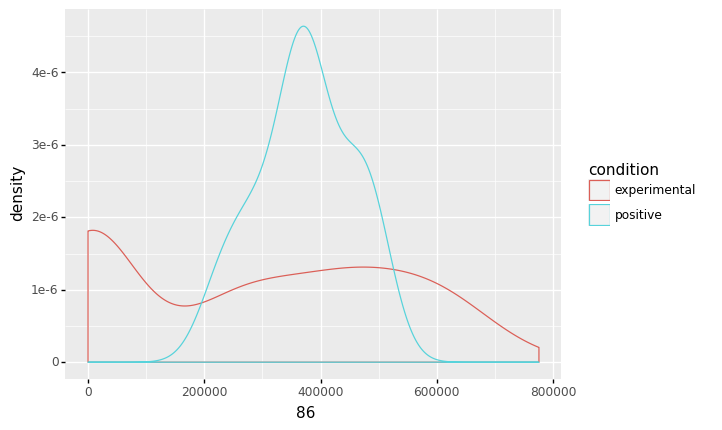

<ggplot: (8778234915828)>

In [20]:
import plotnine as pn

(
#pn.ggplot(a, pn.aes('104/86', color='to_pick'))
#pn.ggplot(a, pn.aes(a['value']['104']))
pn.ggplot(a, pn.aes(a['value']['86'], color='condition'))
+ pn.geom_density()
#+ pn.scale_x_log10()
)